<a href="https://colab.research.google.com/github/KarlaMichelleSorianoSanhez/EDP-1/blob/main/Tarea_de_Garlerkin_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MÉTODO DE GALERKIN


Se desea encontrar una solución aproximada del problema de contorno:

$$
-\,u''(x) + u(x) - x = 0, \quad 0 < x < 1,$$

sujeta a condiciones de frontera homogéneas

$$u(0)=u(1)=0$$

La solución aproximada debe obtenerse utilizando el **método de Galerkin**, considerando una aproximación de la forma:

$$ u_3(x) = \sum_{i=1}^{3} \alpha_i \, \beta_i(x),$$

donde las funciones base están dadas por:

$$\beta_i(x) = \sin(i\pi x), \quad i = 1,2,3.
$$




In [96]:
#importamos librerias

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

##SOLUCIÓN ANALITICA


###Solución analítica del problema

Con el fin de evaluar la calidad de la aproximación obtenida mediante el método de Galerkin, se determina primero la solución exacta del problema de contorno

$$
-\,u''(x) + u(x) - x = 0, \quad 0 < x < 1,
\qquad
u(0) = u(1) = 0.
$$

Reescribiendo la ecuación diferencial, se obtiene

$$
u''(x) - u(x) = -x.
$$

  1. SOLUCIÓN HOMOGENEA.
  La ecuación homogénea asociada es

$$
u''(x) - u(x) = 0,
$$

cuyo polinomio característico está dado por

$$
r^2 - 1 = 0.
$$

De aquí se obtienen las raíces

$$
r = \pm 1,
$$

por lo que la solución general de la ecuación homogénea es

$$
u_h(x) = C_1 e^{x} + C_2 e^{-x}.
$$


  2. SOLUCIÓN PARTICULAR.

  Dado que el término no homogéneo es un polinomio de grado uno, se propone una solución particular de la forma

$$
u_p(x) = Ax + B.
$$

Al sustituir en la ecuación diferencial, se obtiene

$$
0 - (Ax + B) = -x,
$$

lo cual implica

$$
A = 1, \quad B = 0.
$$

Por lo tanto,

$$
u_p(x) = x.
$$

  3. SOLUCIÓN GENERAL Y APLICACIÓN DE CONDICIONES DE FRONTERA.

  La solución general del problema es

$$
u(x) = u_h(x) + u_p(x)
= C_1 e^{x} + C_2 e^{-x} + x.
$$

Aplicando las condiciones de frontera:

$$
u(0) = C_1 + C_2 = 0,
$$
$$
u(1) = C_1 e + C_2 e^{-1} + 1 = 0.
$$

Resolviendo el sistema se obtiene

$$
C_1 = -\frac{1}{e - e^{-1}},
\qquad
C_2 = \frac{1}{e - e^{-1}}.
$$


Por lo tanto, la solución exacta del problema es

$$
u(x) = x - \frac{\sinh(x)}{\sinh(1)}.
$$

In [97]:
#Definimos la variable simbólica y función
x=sp.symbols('x')
u= sp.Function('u')

In [98]:
'''
Ecuación diferencial -u''+u=x
si multiplicamos por -1 toda la ecuación e igualamos a 0

u''- u + x =0

'''
ode = u(x).diff(x,2)-u(x)+x
sp.dsolve(ode,u(x))  #resuelve la ecuación

Eq(u(x), C1*exp(-x) + C2*exp(x) + x)

In [99]:
#Aplicamos condiciones de frontera
sol_exact = sp.dsolve(ode, ics={u(0):0, u(1):0})

print("Solución exacta simbólica:")
sol_exact

Solución exacta simbólica:


Eq(u(x), x - E*exp(x)/(-1 + exp(2)) + E*exp(-x)/(-1 + exp(2)))

In [100]:
#simplificamos la expresion
sol_exact.simplify()

Eq(u(x), (x*(1 - exp(2))*exp(x) + exp(2*x + 1) - E)*exp(-x)/(1 - exp(2)))

In [101]:
#convertimos la solución simbolica a función numérica
u_exact_expr = sol_exact.rhs

u_num = sp.lambdify(x,u_exact_expr, "numpy") #se redefine como arreglo



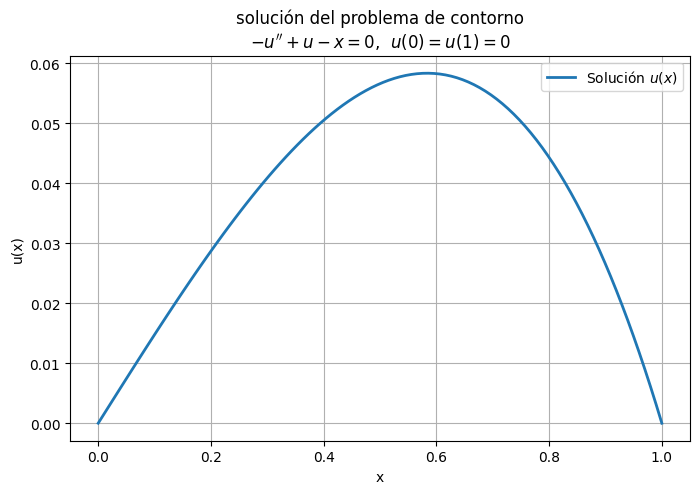

In [102]:

#malla para graficar
xx= np.linspace(0,1,100)
yy= u_num(xx)

#Grafica
plt.figure(figsize=(8,5))
plt.plot(xx,yy , label = "Solución $u(x)$", linewidth=2)
plt.title("solución del problema de contorno\n$-u'' + u -x=0$,  $u(0)=u(1)=0$")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend()
plt.grid(True)
plt.show()

##SOLUCIÓN NÚMERICA

El método de Galerkin pertece a la familia de los métodos de residuos pesados, en los cuales se construye una solución aproximada como una combinación lineal de funciones base que satisfacen las condiciones de frontera del problema.

En este caso, se eligen funciones base senoidales de la forma, $\beta_i(x)=\sin(i\pi x)$, las cuales cumplen automáticamente las condiciones homogeneas  $u(0)=u(1)=0$. Esto permite que la aproximación propuesta satisfaga las condiciones.

La idea fundamental del método consiste en sustituir la aproximación $u_3(x)$ dentro de la ecuación diferecnial original, lo que da lugar a un residuo. Posteriormente, se impone que dicho residuo sea ortogonal a cada una de las funciones base del espacio aproximante. Esta condición conduce a un sistema algebraico para los coeficientes $\alpha_i$, cuya solcuión determina completamente la aproximación buscada.

El uso de fucniones senoidales resulta particularmente conveniente debido a su ortogonalidad en el intervalo $[0,1]$, lo cual sismplifica el sistema resultante y mejora la calidad de la aproximación.



###Aplicación del método de Galerkin

Se propone la aproximación

$$
u_3(x) = \alpha_1 \sin(\pi x) + \alpha_2 \sin(2\pi x) + \alpha_3 \sin(3\pi x).
$$

Derivando dos veces, se obtiene

$$
u_3''(x) =
- \alpha_1 \pi^2 \sin(\pi x)
- 4 \alpha_2 \pi^2 \sin(2\pi x)
- 9 \alpha_3 \pi^2 \sin(3\pi x).
$$

Al sustituir $u_3(x)$ en la ecuación diferencial, se define el residuo

$$
E(x) = u_3''(x) - u_3(x) + x.
$$

El método de Galerkin impone las condiciones de ortogonalidad

$$
\int_0^1 E(x)\,\beta_i(x)\,dx = 0,
\quad i = 1,2,3,$$

lo cual conduce a un sistema de tres ecuaciones algebraicas para los coeficientes $\alpha_1,\alpha_2,\alpha_3$.


In [103]:
#Definimos la variable simbólica
x = sp.symbols('x')
a1, a2, a3 = sp.symbols('a1 a2 a3')
#son los aplha siendo los coeficientes desconocidos

Funciones base o tambien conocida como de prueba

In [104]:
b1 = sp.sin(sp.pi*x)
b2 = sp.sin(2*sp.pi*x)
b3 = sp.sin(3*sp.pi*x)



In [105]:
print("\nFunción de prueba:")
u_3 = a1*b1 + a2*b2 + a3*b3
u_3



Función de prueba:


a1*sin(pi*x) + a2*sin(2*pi*x) + a3*sin(3*pi*x)

Definimos el residuo o error E

In [106]:
#calculamos la segunda derivada
u_3_xx = sp.diff(u_3, x, 2)
u_3_xx

-pi**2*(a1*sin(pi*x) + 4*a2*sin(2*pi*x) + 9*a3*sin(3*pi*x))

In [107]:
#E(x)
E = u_3_xx - u_3 + x
print("\nResiduo E(x):")
E



Residuo E(x):


-a1*sin(pi*x) - a2*sin(2*pi*x) - a3*sin(3*pi*x) + x - pi**2*(a1*sin(pi*x) + 4*a2*sin(2*pi*x) + 9*a3*sin(3*pi*x))

Imponemos las condiciones de Galerkin

$$\int_0^1 E β_1 dx= 0$$

$$\int_0^1 E β_2 dx= 0$$

$$\int_0^1 E β_3 dx= 0$$


o bien las funciones de prueba.
Y resolvemos el sistema de ecuaciones resultantes:

In [108]:
#resolver las integrales y asi obtendremos las ecuaciones del sistema a resolver

I1 = sp.integrate (E*b1, (x,0,1))
print(" Ecuación 1:  ", I1)
I2 = sp.integrate (E*b2, (x,0,1))
print("Ecuación 2:   ", I2)
I3 = sp.integrate (E*b3, (x,0,1))
print("Ecuación 3:   ", I3)


 Ecuación 1:   -pi**2*a1/2 - a1/2 + 1/pi
Ecuación 2:    -2*pi**2*a2 - a2/2 - 1/(2*pi)
Ecuación 3:    -9*pi**2*a3/2 - a3/2 + 1/(3*pi)


In [109]:
#igualar a 0 y resolver el sistema
sol = sp.solve([I1, I2, I3], [a1, a2, a3], simplify=True)

print("\nSolución del sistema para conocer a1, a2, a3:")

sol



Solución del sistema para conocer a1, a2, a3:


{a1: 2/(pi + pi**3), a2: -1/(pi + 4*pi**3), a3: 2/(3*pi + 27*pi**3)}

In [110]:
##sustituir en la función de prueba
u_aprox = u_3.subs(sol)

print("Solución aproximada:")
u_aprox


Solución aproximada:


2*sin(pi*x)/(pi + pi**3) - sin(2*pi*x)/(pi + 4*pi**3) + 2*sin(3*pi*x)/(3*pi + 27*pi**3)

In [111]:
u_approx_fn =sp.lambdify(x,u_aprox, "numpy")

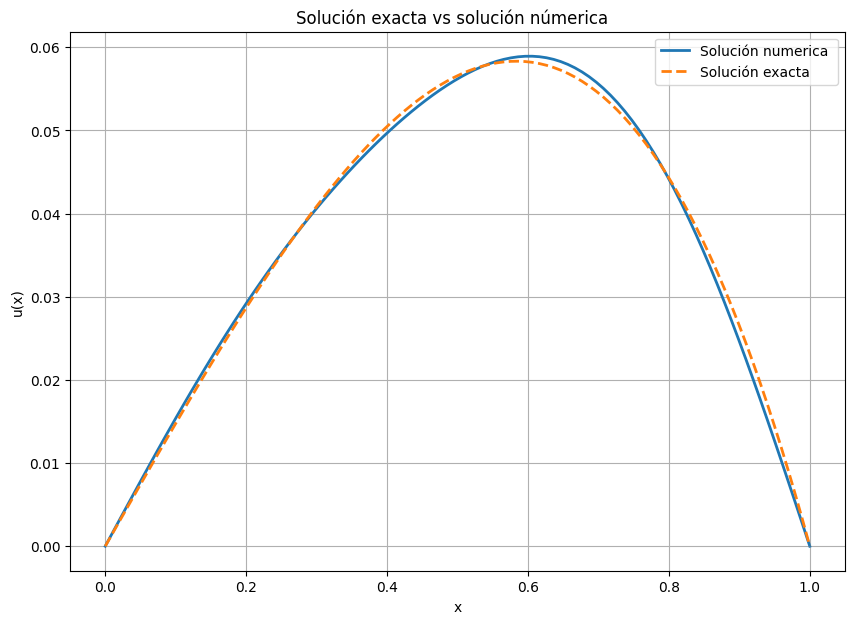

In [112]:
xx= np.linspace(0,1,100)


plt.figure(figsize=(10,7))
plt.plot(xx, u_approx_fn(xx) , label = "Solución numerica ", linewidth=2)
plt.plot(xx, yy,"--", label = "Solución exacta", linewidth=2) #-- tipo de linea punteada

plt.title("Solución exacta vs solución númerica  ")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend()
plt.grid(True)
plt.show()

La comparación de la gráfica entre la solcuión exacta ya la socluión aproximáda muestra que el método de Galerkin es altamente efectivo para aproximar la solución del problema de contorno.
La solución númerica reproduce de manera adecuada la forma, el comprtamiento y los valores casi de la solución exacta en todo el intervalo $[0,1]$.

Las pequeñas diferencias observadas entre ambas solcuiones se deben al uso de un número finito de funciones base y no a deficiencia del método. En general, los resultados confirman que el método de Galerkin proporciona aproximaciones precisas y confiables, incluso con un número reducido de funciones base.

## CALCULO DEL ERROR

A partir de la solución exacta $u_{\text{exacta}}(x)$ y de la aproximación numerica $u_{\text{num}}(x)$, definimos el error en el punto $x$ como:

$$ e(x) = u_{\text{exacta}}(x) - u_{\text{num}}(x).
$$

Luego calculamos:
- el error máximo: $\max |e(x)|$,
- el error cuadrático medio (MSE).

In [113]:
# Evaluación de ambas soluciones en la malla
u_num_vals= u_num(xx)          #solucion exacta
u_aprox_vals = u_approx_fn (xx) #solucion númerica

#error puntual
error = u_num_vals - u_aprox_vals

In [114]:
# Error máximo
error_max = np.max(np.abs(error))

# Error cuadrático medio (MSE)
error_mse = np.mean(error**2)

print("Error máximo:", error_max)
print("Error cuadrático medio (MSE):", error_mse)


Error máximo: 0.001981555865915169
Error cuadrático medio (MSE): 7.055151181451014e-07


El error obtenido es pequeño en todo el intervalo, lo que indica que la solución aproximada por el método de Galerkin reproduce adecuadamente la solución exacta del problema. El valor reducido del error máximo y del error cuadrático medio confirma la efectividad del método incluso al utilizar solo tres funciones base.


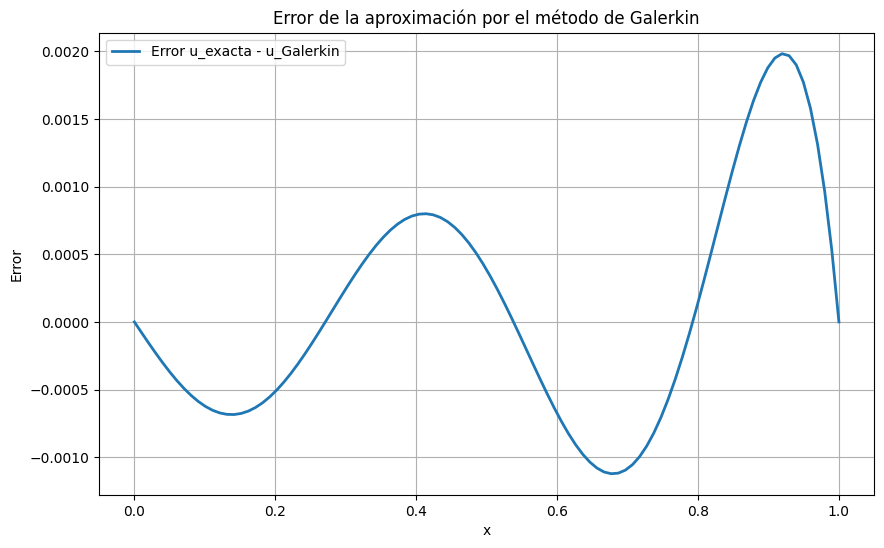

In [115]:
plt.figure(figsize=(10,6))
plt.plot(xx, error, label="Error u_exacta - u_Galerkin", linewidth=2)
plt.xlabel("x")
plt.ylabel("Error")
plt.title("Error de la aproximación por el método de Galerkin")
plt.grid(True)
plt.legend()
plt.show()


La gráfica del error muesta que la diferencia entre la solución exacta y la aproximación por Galerkin es peuqeña en todo el intervalo $[0,1]$. El error oscila alrededor de cero, lo que indica que la aproximación no presenta una desviación sistemática respecto a la solución exacta.

El error se anula en los extremos del intervalo debido a que ambas soluciones cumplen exactamente las condiciones de frontera $u(0)=u(1)=0$.
Los valores máximos del error aparecen en el interior del dominio, donde la solución presenta mayor curvatura y el número finito de funciones base limita la precisión local.

En conjunto, la magnitud reducida del error confirma la efectividad del método de Galerkin para aproximar la solución del problema con un número reducido de funciones base.
